In [224]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [225]:
import matplotlib.pyplot as plt

## Load the dataset

In [226]:
data=pd.read_csv(r"C:\Users\shubhamkumar9.vc\Downloads\train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [227]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Showing rows and columns of dataset

In [228]:
data.shape

(8523, 12)

> It has 8523 rows and 12 columns

## Discriptive statistics of dataset

In [229]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## checking null values present in dataset

In [230]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [231]:
data.isnull().sum()/data.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

> Item weight has 1463 null values which is 17.16% of total data.

> Outlet size has 2410 null values which is 28.27 % of toal data.

## lets impute  the null values

In [232]:
data['Item_Weight'].value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [233]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

> Item weight is a numerical variable, so we will replace it with mean/median.

> Outlet size is categorical variable, so we will replace it with mode.

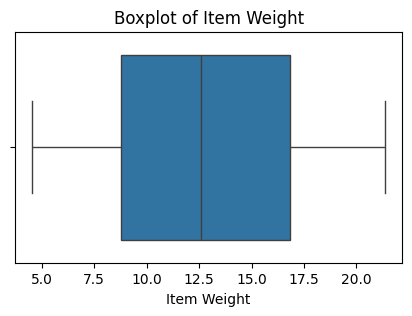

In [234]:
# checking outliers present in item_weight
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
sns.boxplot(x=data['Item_Weight'])

plt.title('Boxplot of Item Weight')
plt.xlabel('Item Weight')
plt.show()


> There is no outliers, so we will impute with mean values.

## Imputing missing values

In [235]:
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())
data['Outlet_Size']=data['Item_Weight'].fillna('Medium')

In [236]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## checking duplicate data

In [237]:
data.duplicated().any()

False

## item_fat_content

In [238]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [239]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace("LF","Low Fat")
data['Item_Fat_Content']=data['Item_Fat_Content'].replace("low fat","Low Fat")
data['Item_Fat_Content']=data['Item_Fat_Content'].replace("reg","Regular")

In [240]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [241]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

## item_visibility

In [242]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

> it has 526 rows as 0.0000, lets impute this also.

In [243]:
data['Item_Visibility']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

> Interpolation is a method of estimating missing values based on other available data points. Since you've replaced 0 with NaN, you now have gaps (missing values) in the Item_Visibility column. Linear interpolation is a straightforward way of filling these gaps, assuming that the missing values follow a roughly linear trend between the known values.

In [244]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

## Item_Identifier

In [245]:
data['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [246]:
data['Item_Identifier']=data['Item_Identifier'].apply(lambda x:x[:2])

In [247]:
data['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

## create new column as outlet_age

In [248]:
import datetime as dt
data['outlet_age']=dt.datetime.today().year-data['Outlet_Establishment_Year']

In [249]:
data['outlet_age'].value_counts()

outlet_age
39    1463
37     932
25     930
27     930
20     930
22     929
15     928
17     926
26     555
Name: count, dtype: int64

In [250]:
# drop Outlet_Establishment_Year
data.drop(columns='Outlet_Establishment_Year',axis=1,inplace=True)

In [251]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'outlet_age'],
      dtype='object')

## HAndling Categorical Columns

In [252]:
import sklearn

In [253]:
from sklearn.preprocessing import OrdinalEncoder

In [254]:
data_encoded=data.copy()

cat_col=data.select_dtypes(include=['object']).columns

for i in cat_col:
    oe=OrdinalEncoder()
    data_encoded[i]=oe.fit_transform(data_encoded[[i]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['Low Fat', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [255]:
data_encoded.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_age
0,1.0,9.30,0.0,0.016047,4.0,249.8092,9.0,9.30,0.0,1.0,3735.1380,25
1,0.0,5.92,1.0,0.019278,14.0,48.2692,3.0,5.92,2.0,2.0,443.4228,15
2,1.0,17.50,0.0,0.016760,10.0,141.6180,9.0,17.50,0.0,1.0,2097.2700,25
3,1.0,19.20,1.0,0.015755,6.0,182.0950,0.0,19.20,2.0,0.0,732.3800,26
4,2.0,8.93,0.0,0.014751,9.0,53.8614,1.0,8.93,2.0,1.0,994.7052,37


## drop target variable

In [256]:
X=data_encoded.drop('Item_Outlet_Sales',axis=1)
y=data_encoded['Item_Outlet_Sales']

In [257]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,outlet_age
0,1.0,9.30,0.0,0.016047,4.0,249.8092,9.0,9.30,0.0,1.0,25
1,0.0,5.92,1.0,0.019278,14.0,48.2692,3.0,5.92,2.0,2.0,15
2,1.0,17.50,0.0,0.016760,10.0,141.6180,9.0,17.50,0.0,1.0,25
3,1.0,19.20,1.0,0.015755,6.0,182.0950,0.0,19.20,2.0,0.0,26
4,2.0,8.93,0.0,0.014751,9.0,53.8614,1.0,8.93,2.0,1.0,37


In [258]:
X.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'outlet_age'],
      dtype='object')

In [259]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## Random Forest Regressor

In [260]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf=RandomForestRegressor(n_estimators=100,random_state=101)
scores=cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5474519087393552


## XGBRFRegressor

In [261]:
import xgboost

In [262]:
from xgboost import XGBRegressor

xg=XGBRegressor(n_estimators=100,random_state=101)
scores1=cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores1.mean())

0.5052083544357993


## XGBRegressor Feature Importance

In [263]:
xg=xg=XGBRegressor(n_estimators=100,random_state=101)

xg1=xg.fit(X,y)

pd.DataFrame({
    'features':X.columns,
    'XGBRF_importance':xg1.feature_importances_
}).sort_values(by='XGBRF_importance',ascending=False)

,features,XGBRF_importance
9,Outlet_Type,0.746922
5,Item_MRP,0.114439
3,Item_Visibility,0.019656
4,Item_Type,0.019585
6,Outlet_Identifier,0.017968
10,outlet_age,0.017723
1,Item_Weight,0.016897
8,Outlet_Location_Type,0.016821
2,Item_Fat_Content,0.016294
0,Item_Identifier,0.013694


In [264]:
X=X.drop(columns=['Item_Weight','Outlet_Location_Type','Item_Fat_Content','Item_Identifier','Outlet_Size'],axis=1)

In [265]:
X.columns

Index(['Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Type', 'outlet_age'],
      dtype='object')

In [266]:
from xgboost import XGBRegressor

xg=XGBRegressor(n_estimators=100,random_state=101)
scores1=cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores1.mean())

0.5154466357303924


In [267]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf=RandomForestRegressor(n_estimators=100,random_state=101)
scores=cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5475494888379812


In [269]:
final_data=X
final_data.head()

,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Type,outlet_age
0,0.016047,4.0,249.8092,9.0,1.0,25
1,0.019278,14.0,48.2692,3.0,2.0,15
2,0.016760,10.0,141.6180,9.0,1.0,25
3,0.015755,6.0,182.0950,0.0,0.0,26
4,0.014751,9.0,53.8614,1.0,1.0,37


## Best Model

In [273]:
from xgboost import XGBRegressor
xg_final=XGBRegressor(base_score=0.5,booster='gbtree',colsample_bylevel=1,gamma=0,importance_type='gain')


In [274]:
xg_final.fit(final_data,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=None,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [275]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train,X_test,y_train,y_test=train_test_split(final_data,y,test_size=0.25,random_state=101)

In [276]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6392, 6)
(2131, 6)
(6392,)
(2131,)


In [277]:
xg_final.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=None,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [280]:
y_pred=xg_final.predict(X_test)

In [281]:
mean_absolute_error(y_test,y_pred)

801.9939245746416

# Prediction on unseen data

In [289]:
pred=xg_final.predict(np.array([[0.016046,3.9,248,8,1,20]]))[0]

In [290]:
pred

6193.813

In [291]:
print(f"Sales values is between {pred-801.99} and {pred+801.99}")

Sales values is between 5391.82298828125 and 6995.80298828125


## Save model using Joblib

In [292]:
import joblib

In [293]:
joblib.dump(xg_final,'big_mart_sales_model')

['big_mart_sales_model']

In [294]:
model=joblib.load('big_mart_sales_model')

In [296]:
pred=model.predict(np.array([[0.016046,2.9,28,8,1,20]]))[0]
pred

1057.2555

In [297]:
print(f"Sales values is between {pred-801.99} and {pred+801.99}")

Sales values is between 255.2654931640625 and 1859.2454931640625
